# Colorectal Cancer Risk & Survival Prediction

## Objective
The goal of this project is to predict the **survival status** of colorectal cancer patients based on their demographics, medical history, and lifestyle factors.

## Dataset Overview
The dataset contains records of **colorectal cancer patients**, with features related to risk factors, treatment, and outcomes.

## Instructions
1. **Data Exploration**: Load and examine the dataset.
2. **Data Preprocessing**: Handle missing values, encode categorical variables, and normalize numerical features.
3. **Feature Selection**: Identify important predictors for survival.
4. **Model Training**: Train a classification model to predict survival status.
5. **Evaluation**: Assess model performance using accuracy and classification reports.

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

In [2]:
# Load the dataset
df = pd.read_csv('colorectal_cancer_prediction.csv')

# Display basic information about the dataset
print("Dataset Shape:", df.shape)
print("\nColumn Names:", df.columns.tolist())

# Display data types and non-null counts
print("\nDataset Info:")
print(df.info())

# Display first few rows
print("\nFirst 5 rows:")
print(df.head())

# Summary statistics for numerical features
print("\nSummary Statistics:")
print(df.describe())

Dataset Shape: (89945, 30)

Column Names: ['Patient_ID', 'Age', 'Gender', 'Race', 'Region', 'Urban_or_Rural', 'Socioeconomic_Status', 'Family_History', 'Previous_Cancer_History', 'Stage_at_Diagnosis', 'Tumor_Aggressiveness', 'Colonoscopy_Access', 'Screening_Regularity', 'Diet_Type', 'BMI', 'Physical_Activity_Level', 'Smoking_Status', 'Alcohol_Consumption', 'Red_Meat_Consumption', 'Fiber_Consumption', 'Insurance_Coverage', 'Time_to_Diagnosis', 'Treatment_Access', 'Chemotherapy_Received', 'Radiotherapy_Received', 'Surgery_Received', 'Follow_Up_Adherence', 'Survival_Status', 'Recurrence', 'Time_to_Recurrence']

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89945 entries, 0 to 89944
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Patient_ID               89945 non-null  int64  
 1   Age                      89945 non-null  int64  
 2   Gender                   89945 non-null 

## Exploratory Data Analysis (EDA)
- Check for missing values
- Visualize key distributions
- Identify correlations between features

Missing Values in Each Column:

Patient_ID                 0
Age                        0
Gender                     0
Race                       0
Region                     0
Urban_or_Rural             0
Socioeconomic_Status       0
Family_History             0
Previous_Cancer_History    0
Stage_at_Diagnosis         0
Tumor_Aggressiveness       0
Colonoscopy_Access         0
Screening_Regularity       0
Diet_Type                  0
BMI                        0
Physical_Activity_Level    0
Smoking_Status             0
Alcohol_Consumption        0
Red_Meat_Consumption       0
Fiber_Consumption          0
Insurance_Coverage         0
Time_to_Diagnosis          0
Treatment_Access           0
Chemotherapy_Received      0
Radiotherapy_Received      0
Surgery_Received           0
Follow_Up_Adherence        0
Survival_Status            0
Recurrence                 0
Time_to_Recurrence         0
dtype: int64


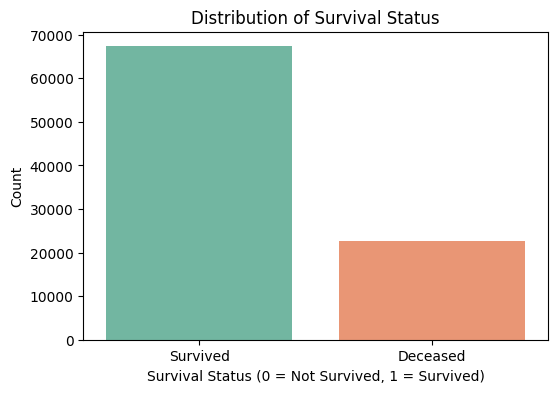

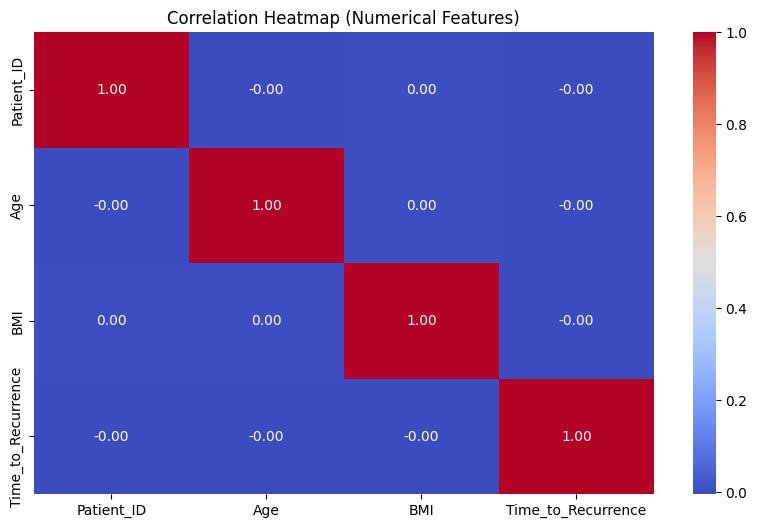

In [3]:
# Check for missing values
print("Missing Values in Each Column:\n")
print(df.isnull().sum())

# Visualize survival status distribution
plt.figure(figsize=(6,4))
sns.countplot(x='Survival_Status', data=df, hue='Survival_Status', legend=False, palette='Set2')
plt.title('Distribution of Survival Status')
plt.xlabel('Survival Status (0 = Not Survived, 1 = Survived)')
plt.ylabel('Count')
plt.show()

# Correlation heatmap (numerical features only)
plt.figure(figsize=(10,6))
numeric_df = df.select_dtypes(include=['float64', 'int64'])
sns.heatmap(numeric_df.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap (Numerical Features)')
plt.show()

## Data Preprocessing
- Handle missing values
- Encode categorical variables
- Normalize numerical features

In [5]:
# Drop unnecessary columns (e.g., Patient ID if present)
if 'Patient_ID' in df.columns:
    df = df.drop(columns=['Patient_ID'])

# Encode categorical variables
df_encoded = pd.get_dummies(df, drop_first=True)
df_encoded.columns

Index(['Age', 'BMI', 'Time_to_Recurrence', 'Gender_Male', 'Race_Black',
       'Race_Hispanic', 'Race_Other', 'Race_White', 'Region_Asia Pacific',
       'Region_Europe', 'Region_Latin America', 'Region_North America',
       'Urban_or_Rural_Urban', 'Socioeconomic_Status_Low',
       'Socioeconomic_Status_Middle', 'Family_History_Yes',
       'Previous_Cancer_History_Yes', 'Stage_at_Diagnosis_II',
       'Stage_at_Diagnosis_III', 'Stage_at_Diagnosis_IV',
       'Tumor_Aggressiveness_Low', 'Tumor_Aggressiveness_Medium',
       'Colonoscopy_Access_Yes', 'Screening_Regularity_Never',
       'Screening_Regularity_Regular', 'Diet_Type_Traditional',
       'Diet_Type_Western', 'Physical_Activity_Level_Low',
       'Physical_Activity_Level_Medium', 'Smoking_Status_Former',
       'Smoking_Status_Never', 'Alcohol_Consumption_Low',
       'Alcohol_Consumption_Medium', 'Red_Meat_Consumption_Low',
       'Red_Meat_Consumption_Medium', 'Fiber_Consumption_Low',
       'Fiber_Consumption_Medium', 'I

In [7]:
# Define features and target variable
 # Adjusted target column name as needed
target_col = 'Survival_Status_Survived'
X = df_encoded.drop(columns=[target_col])
y = df_encoded[target_col]

# Split into train and test sets
from sklearn.model_selection import train_test_split

# Split data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

## Model Training
Train a **Logistic Regression** model to predict patient survival.

In [ ]:
# Train a Logistic Regression model
model = LogisticRegression(max_iter=500, solver='liblinear', class_weight='balanced', random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Model Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


### Additional step done to improve accuracy
Random Forest has been used to better the results

In [12]:
# Step: Improve Accuracy using Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Training a balanced, tuned Random Forest
rf_model_tuned = RandomForestClassifier(
    n_estimators=300,          # more trees = better averaging
    max_depth=20,              # limit depth to avoid overfitting
    min_samples_split=5,       # controlling split size
    min_samples_leaf=4,        # avoiding tiny leaves
    class_weight='balanced_subsample',  # balance on each tree
    random_state=42,
    n_jobs=-1
)

rf_model_tuned.fit(X_train, y_train)

# Predictions
y_pred_rf_tuned = rf_model_tuned.predict(X_test)

# Evaluation (handle zero division)
print("Tuned Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf_tuned))
print("Classification Report:\n", classification_report(y_test, y_pred_rf_tuned, zero_division=0))

Tuned Random Forest Accuracy: 0.7486797487353383
Classification Report:
               precision    recall  f1-score   support

       False       0.50      0.00      0.00      4521
        True       0.75      1.00      0.86     13468

    accuracy                           0.75     17989
   macro avg       0.62      0.50      0.43     17989
weighted avg       0.69      0.75      0.64     17989

